# Musical Theatre Eras: An Analysis


## Background

Musical Theatre is an art form that dates since Ancient Greece where there were plays with song and dance. However, Musical Theatre in the format we conceive musicals today has been around since the late 1800's and has greatly evolved ever since. 

When studying Musical Theatre, we usually discuss its periods. However, there is no consensus about how many periods or eras exist. The only common thread is the Golden Age that most people agree encompasses some period between the 1940's and 1960's.

This analysis will focus on understanding Musical Theatre eras


## Research questions and/or hypotheses

#### Q1: Can we identify how many Musical Theatre eras exist using audio features from songs? 

#### Q2:  Can we classify Musical Theatre songs into three distinct periods: Early Age (pre-Golden Age), Golden Age, and Modern/Contemporary (Post-Golden Age) 

#### Q3: Hypothesis: 
- Contemporary musicals' songs have longer duration than the other periods.
- Contemporary musicals' songs have more speechiness than the other periods.
- Contemporary musicals' songs have more loudness than the other periods.
- Early Age musicals' songs have slower tempo than the most recent periods.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import os


Bad key "text.kerning_factor" on line 4 in
/Users/andreiasodrenichols/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Get Data

For this project, we are using a dataset I created in 2017 that contains features from musical theater songs. The dataset is available [here](https://github.com/andreiabds/orpheus). 

The dataset was originally created using data from: 
- Wikipedia: list of musical theater titles, with composer, lyricist, and year 
- Spotify: music features dataset from 
- stlyrics.com: lyrics 

We used the titles from the musicals to download music features from songs of albuns that matched the musical titles. To clean the dataset so it would only contain songs from musicals, we used [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) to match song titles per album of the dataset with song titles per album in the stlyrics website, which is a lyrics website that is curated to contain only soundtrack lyrics. 


In [2]:
#Create folder to save figures
os.makedirs('figures', exist_ok=True)

In [3]:
#download data into current directory
!curl -O https://raw.githubusercontent.com/andreiabds/orpheus/master/data/COMPLETE_DATA.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  26.8M      0 --:--:-- --:--:-- --:--:-- 29.6M


In [4]:
#load dataset
musical_songs_features = pd.read_csv('COMPLETE_DATA.csv')
musical_songs_features.head()

,Unnamed: 0,sp_track_id,wikipedia_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,lyrics,composer_label,lyricist_label
0,0,3zMmwGpzl1QavkjMGgj9es,Anyone Can Whistle,0.52,0.671,8.0,-8.152,1.0,0.146,0.584,0.468,0.0738,0.692,116.584,61227.0,1,1964,"NARRATOR: Well, the whole town has gone absolu...",800,813
1,1,4phkpBRrdaZ8yB13BQ2XoE,Anyone Can Whistle,0.548,0.627,10.0,-9.360,1.0,0.458,0.640,0.000,0.483,0.526,123.195,264773.0,4,1964,MAYORESS CORA HOOVER HOOPER: Everyone hates me...,800,813
2,2,2EzJ9a2zMN0HO7PiblcO6C,Anyone Can Whistle,0.474,0.634,2.0,-8.401,1.0,0.121,0.770,0.000,0.763,0.575,104.041,267627.0,4,1964,CORA: Baby Joan! MRS. SCHROEDER: Baby Joan! I...,800,813
3,3,1CtGmYxK6fwjKOopL5aTmf,Anyone Can Whistle,0.442,0.357,5.0,-10.144,1.0,0.0355,0.748,0.000,0.172,0.523,76.233,157200.0,3,1964,FAY: Those smug little men with their smug lit...,800,813
4,4,4pi39D3h1MdZOy5wgBGx8O,Anyone Can Whistle,0.618,0.511,0.0,-9.713,1.0,0.499,0.782,0.000,0.648,0.657,113.815,777200.0,4,1964,"NARRATOR: Good Lord! This time, the water real...",800,813


## Data Cleaning and EDA 

The dataset needs a little bit of data cleaning. 

We are dropping an empty song. 

There is one musical () that had two Broadway productions listed on Wikpedia, thus turning the feature year in our dataset as a string and limiting our capacity of placing this musical into a specific era. Chose the earlier date to represent its year.

We also filled missing audio features with a very high number (99). Usually these features range from 0.0 to 1.0.

We also fixed the data types of the columns, turning most columns into floats. 

In [5]:
# Data cleaning
musical_songs_features = musical_songs_features.dropna()
musical_songs_features=musical_songs_features.replace({'year': '1971/1999'}, 1971)
musical_songs_features = musical_songs_features.replace('None',99 )

# Cleaning data types
column_types = {'Unnamed: 0': 'int', 
              'sp_track_id': 'object', 
              'wikipedia_title': 'object', 
              'danceability': 'float',
              'energy': 'float' , 
              'key': 'float', 
              'loudness': 'float', 
              'mode': 'float', 
              'speechiness' : 'float', 
              'acousticness': 'float',
              'instrumentalness': 'float', 
              'liveness': 'float', 
              'valence': 'float', 
              'tempo': 'float', 
              'duration_ms': 'float',
              'time_signature': 'float', 
              'year': 'int', 
              'lyrics': 'object', 
              'composer_label': 'object', 
              'lyricist_label': 'object'}


for key in column_types:
    musical_songs_features[key]= musical_songs_features[key].astype(column_types[key])


musical_songs_features.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7.815000e+03,7815.000000,7815.000000
mean,3907.051823,0.617680,0.369356,4.978247,-12.703830,0.799744,0.233368,0.682045,0.080288,0.241925,0.634883,115.981840,1.966789e+05,3.916315,1974.350096
std,2256.225634,3.525548,0.221075,3.528311,5.096816,0.400217,3.538136,0.283510,0.233859,1.133077,4.174443,31.253798,9.867500e+04,3.457876,23.792707
min,0.000000,0.063200,0.001330,0.000000,-40.819000,0.000000,0.023400,0.000002,0.000000,0.017300,0.033500,0.000000,7.653000e+03,1.000000,1897.000000
25%,1953.500000,0.372000,0.199000,2.000000,-15.538500,1.000000,0.037900,0.554500,0.000000,0.102000,0.254000,90.895500,1.403000e+05,4.000000,1956.000000
50%,3907.000000,0.499000,0.330000,5.000000,-12.353000,1.000000,0.051400,0.786000,0.000002,0.150000,0.450000,114.403000,1.867730e+05,4.000000,1973.000000
75%,5860.500000,0.612500,0.505000,8.000000,-9.077500,1.000000,0.107000,0.897000,0.000383,0.301000,0.645000,135.626500,2.359130e+05,4.000000,1997.000000
max,7815.000000,99.000000,0.995000,11.000000,-1.541000,1.000000,99.000000,0.996000,0.988000,99.000000,99.000000,213.840000,3.398502e+06,99.000000,2014.000000


Looking at the distribution of musicals over the years, we notice that we have a good spread of musicals across all decades, with more concentration of musicals in the most recent decades. 

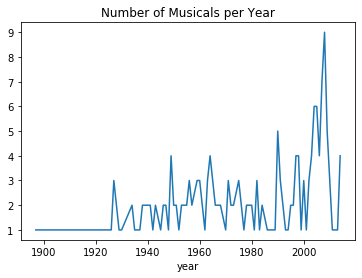

In [6]:
musical_songs_features.groupby('year')['wikipedia_title'].nunique().plot(title='Number of Musicals per Year')
#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/MusicalsPerYear.jpg')

## Q1:  How many musical eras are there?

In this section, we will use the audio features and attempt to make clusters of musicals emerge. We are assuming the the clusters would represent the different periods or eras that we can organize musicals. 

In [7]:
audio_features = ['danceability',
           'energy', 
           'speechiness', 
           'acousticness',
           'instrumentalness', 
           'duration_ms',
           'key', 
           'loudness', 
           'mode', 
           'liveness', 
           'valence', 
           'tempo', 
           'time_signature']

We K-means, a simple clustering algorithm, to create clusters of musical songs. 

We first need to scale our data using the MinMaxScaler. Then, we will ran our clustering algorithm with different number of clusters. Finally, we will use the Elbow Method to identify the optimal number of clusters. 


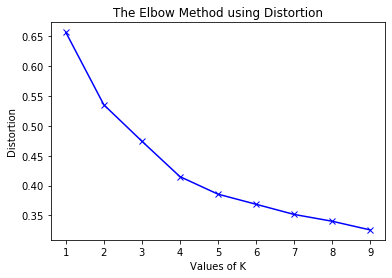

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist 

scaler = MinMaxScaler()
X = scaler.fit_transform(musical_songs_features[audio_features])


# The code below is from geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
distortions = [] 
mapping1 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 

#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/KMeans_ElbowMethod.jpg')

#### Results
There is no clear optimal number of clusters based on the Elbow Method. Therefore, we were not able to use audio features data to identify how many musical eras exist.  

# Q2: Can we use audio features to classify Musical Theatre songs into three distinct periods? 


We will train a classifier to assign songs into three different categories: Early Age (pre-Golden Age), Golden Age, and Modern/Contemporary (Post-Golden Age). 

We will consider Golden Era to be between 1943 and 1968, as this seems to be a common denomination. [[1]](https://www.chicagostagereview.com/history-of-musical-theatre-timeline/)  [[2]](https://trace.tennessee.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1093&context=gamut
)

Songs from musicals prior to 1943 will be labeled 'Early Age'.
Songs from musicals post 1968 will be labeled 'Modern Contemporary'.

In [9]:
conditions = [musical_songs_features['year'] > 1968,
              musical_songs_features['year'] < 1943]

# User Friendly Name for musical period
choices = ['Modern/Contemporary', 'Early Age']
musical_songs_features['musical_period'] = np.select(conditions, choices, default='Golden Age')

# creating target for classifier
choices_target = [3, 1]
musical_songs_features['target'] = np.select(conditions, choices_target, default=2)



Looking at the distribution of the songs between the three different periods, we can notice that the majority of songs belong to the Modern/Contemporary Age.
Early Age has the least song, however, it still has a significant amount of songs. 

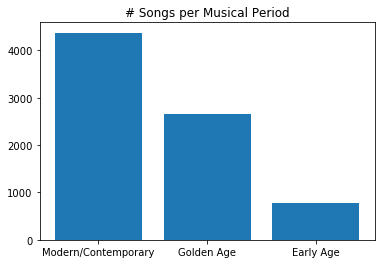

In [10]:
y = musical_songs_features['musical_period'].value_counts().values
x = musical_songs_features['musical_period'].value_counts().index.values

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xticks(x)

plt.title('# Songs per Musical Period')
#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/SongsPerPeriod.jpg')

Since Modern/Contemporary Age is our majority class, we will consider a good baseline accuracy for our model to be above 55.94%. That is, our model will have better performance than a model that always picks the majority class. 

In [11]:
modern_songs = musical_songs_features['musical_period'].value_counts()['Modern/Contemporary']
all_songs = np.sum(musical_songs_features['musical_period'].value_counts().values)

modern_songs/all_songs

0.5594369801663468

We train a Random Forest Classifier with 60% of our data. 

Our results are good! We get an accuracy score of almost 70% 

Looking further into other metrics, we notice that our classifier performs better on songs from Modern/Contemporary Musicals (3), while it performs worst on songs from Early Age (1). 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# preparing data, train/test split -
X = musical_songs_features[audio_features]
y = musical_songs_features['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

# training Random Forest Classifier
clf = RandomForestClassifier(class_weight ="balanced" , n_estimators=100, max_depth=20, min_samples_split=2, random_state=4)
clf.fit(X_train, y_train)

# Testing results on test set, print metrics
pred = clf.predict(X_test)
print(metrics.classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           1      0.636     0.197     0.301       320
           2      0.607     0.611     0.609      1055
           3      0.754     0.846     0.797      1751

    accuracy                          0.700      3126
   macro avg      0.666     0.551     0.569      3126
weighted avg      0.692     0.700     0.683      3126



Looking at the feature importance from our classifier, we find it surprising that acousticness appeared at the top as one of the most important features.

At the same time, it is interesting that features that we will explore in our hypothesis also appear at the top (e.g., speechiness, duration_ms, loudness). 

In [13]:
importances = clf.feature_importances_
important = pd.DataFrame(audio_features)
important['feature_rank'] = importances
important.sort_values(by='feature_rank', ascending=False).reset_index(drop=True)

,0,feature_rank
0,acousticness,0.146744
1,energy,0.102566
2,speechiness,0.095397
3,duration_ms,0.091583
4,loudness,0.089191
5,valence,0.087852
6,danceability,0.084538
7,tempo,0.078648
8,instrumentalness,0.077056
9,liveness,0.077025


### Results:
Yes! We can use audio features to classify our musical songs into three distinct periods. However, our classifier has better results with songs from Modern/Contemporary Musicals. 

# Q3: Hypothesis Tests

Plotting the median value of each audio feature per period, so we can have a visual to compare across periods. 


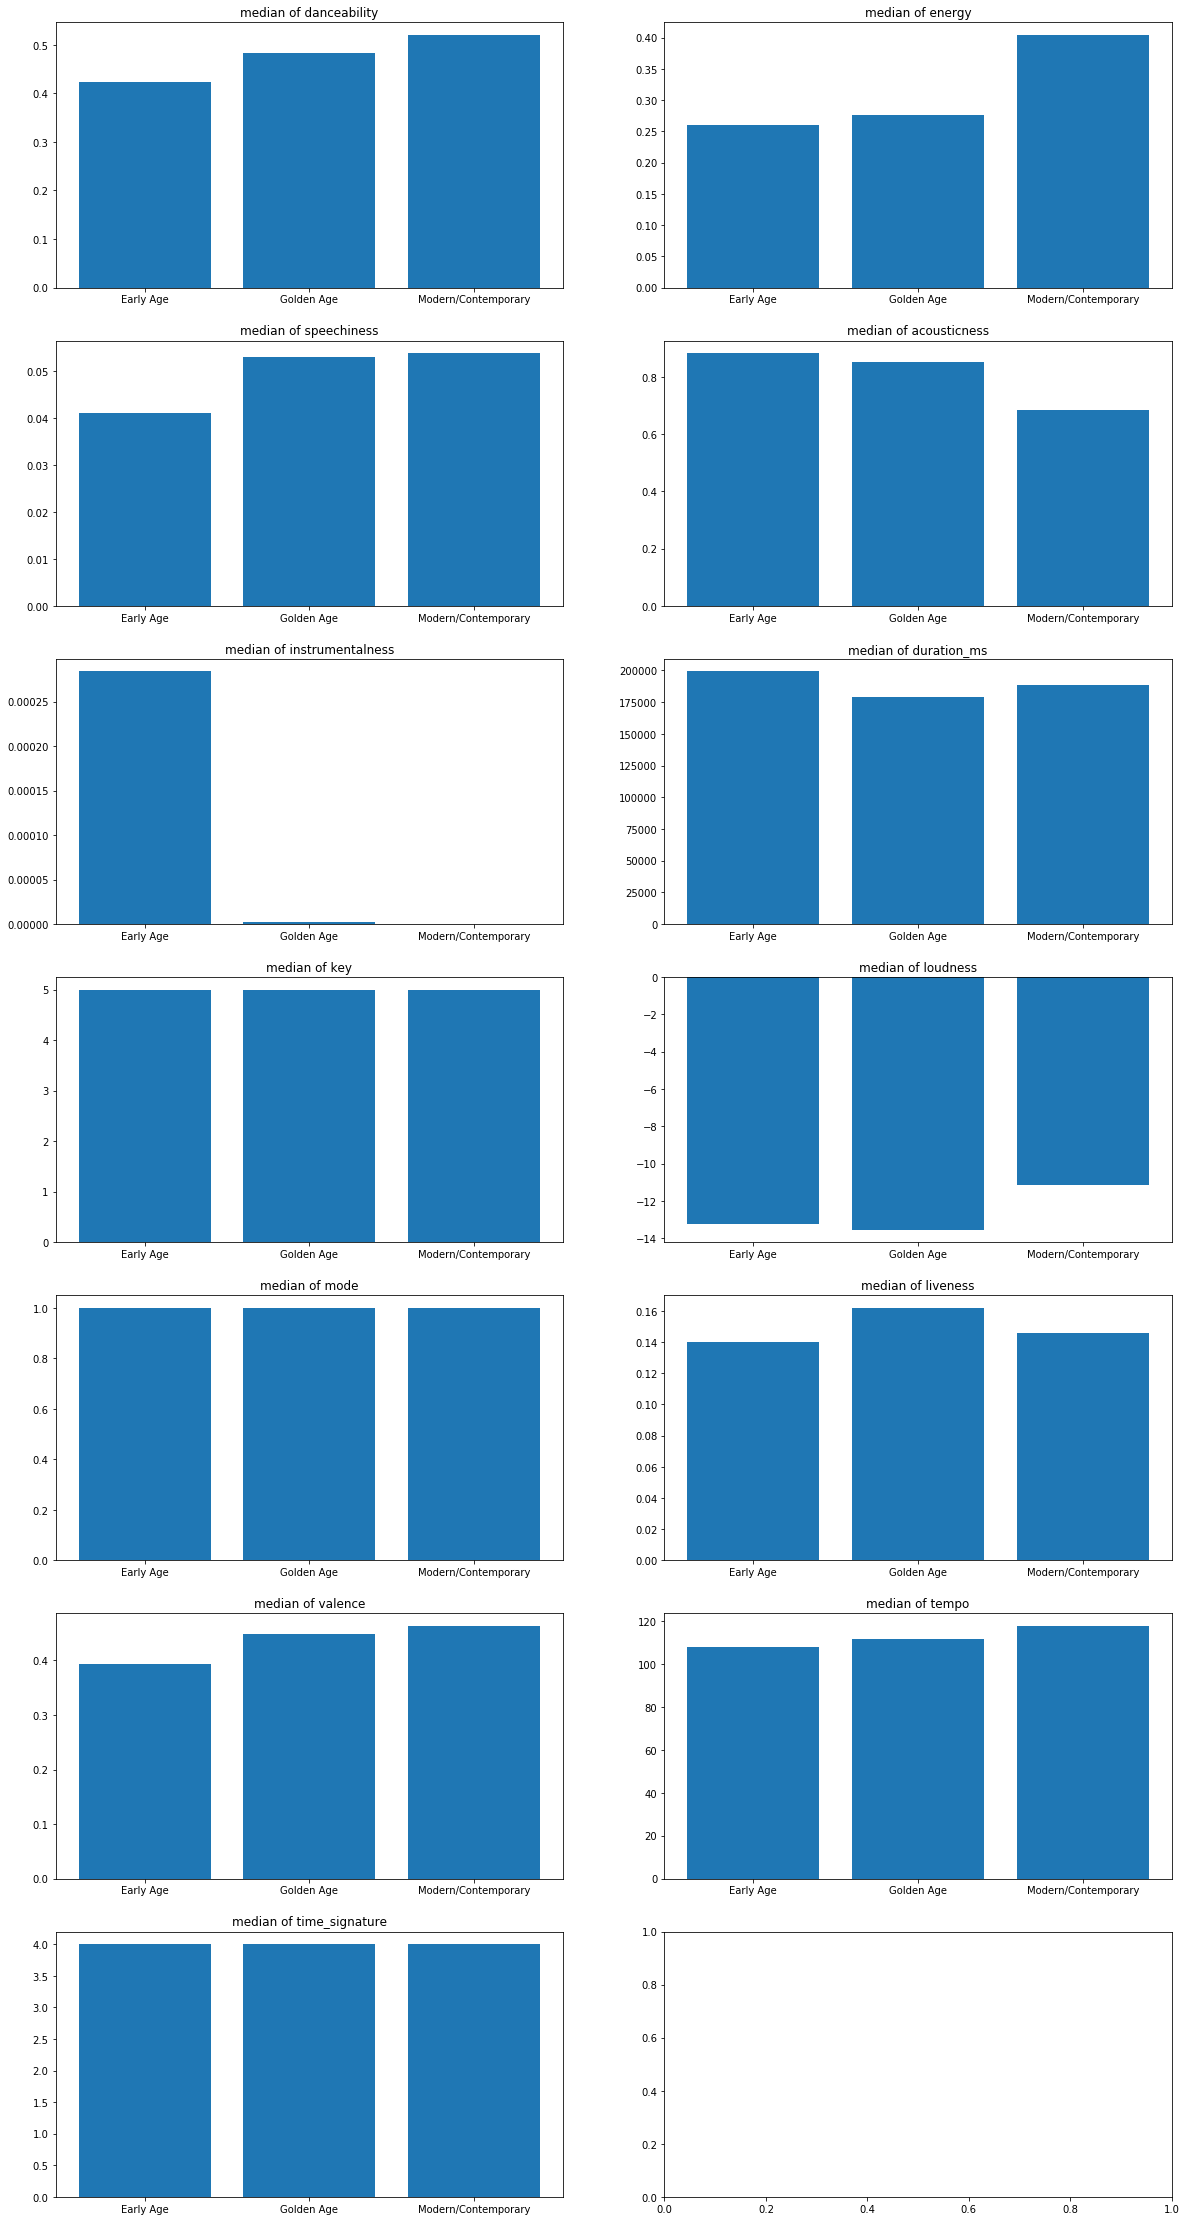

In [14]:
median = musical_songs_features.groupby('musical_period').median()


n = round((len(audio_features) + 1)/2)

fig, axs = plt.subplots(n, 2, figsize=(20,40))
x = median.index.values

for i in range(len(audio_features)):
    feature_name = audio_features[i]
    if i%2 == 0:
        x2=0
        x1 = round(i/2)
    else:
        x2=1
        x1 = round((i-1)/2)
    axs[x1,x2].bar(x, median[feature_name])
    axs[x1,x2].set_xticks(x)
    axs[x1,x2].title.set_text('median of ' + feature_name)
    
    
#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/MedianAudioFeaturesPerPeriod.jpg')

We separate the songs into different datasets so we can perform our statistical test. We chose the [MannWhitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) because it is a great option to test populations of different sizes, given that we have a very unbalanced distribution of songs across the three periods. 

In [15]:
# Dataset for hypothesis about modern/contemporary musicals
contemporary_musicals = musical_songs_features[musical_songs_features['target']==3]
non_contemporary_musicals = musical_songs_features[musical_songs_features['target']!=3]

# Dataset for hypothesis about early musicals
early_musicals = musical_songs_features[musical_songs_features['target']==1]
non_early_musicals = musical_songs_features[musical_songs_features['target']!=1]

In [16]:
from scipy.stats import mannwhitneyu

### Speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. [[source]](https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object)


- H0: Modern/Contemporary musicals songs have smaller or equal speechiness to songs from other periods

- H1: Modern/Contemporary musicals songs have greater speechiness to songs from other periods


<b> Result </b>: We reject the null hypothesis. 

MannwhitneyuResult(statistic=7936671.0, pvalue=1.7105330773238287e-05)


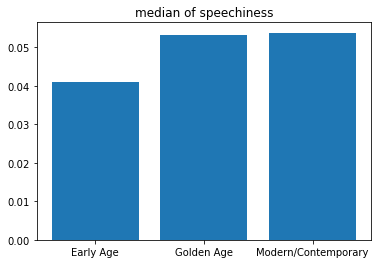

In [17]:
print(mannwhitneyu(contemporary_musicals['speechiness'],non_contemporary_musicals['speechiness'], alternative='greater' ))

plt.bar(x, median['speechiness'])
plt.title('median of speechiness')
#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/MedianPerPeriodSpeechiness.jpg')

### Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.[[source]](https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object)


- H0: Modern/Contemporary musicals songs have smaller or equal loudness to songs from other periods

- H1: Modern/Contemporary musicals songs have greater loudness to songs from other periods


<b> Result </b>: We reject the null hypothesis. 

MannwhitneyuResult(statistic=9721498.0, pvalue=3.4289161779179547e-109)


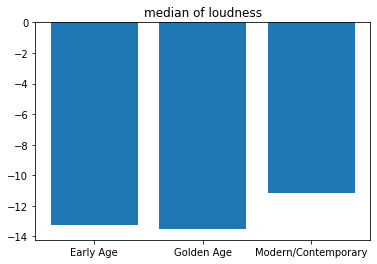

In [18]:
print(mannwhitneyu(contemporary_musicals['loudness'],non_contemporary_musicals['loudness'], alternative='greater' ))

plt.bar(x, median['loudness'])
plt.title('median of loudness')
#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/MedianPerPeriodLoudness.jpg')

### Duration
The duration of the track in milliseconds.[[source]](https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object)




- H0: Modern/Contemporary musicals songs have smaller or equal duration to songs from other periods

- H1: Modern/Contemporary musicals songs have greater duration to songs from other periods


<b> Result </b>: We reject the null hypothesis. 

MannwhitneyuResult(statistic=7777283.5, pvalue=0.005642394558058948)


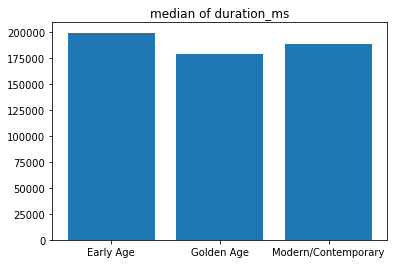

In [19]:
print(mannwhitneyu(contemporary_musicals['duration_ms'],non_contemporary_musicals['duration_ms'], alternative='greater' ))

plt.bar(x, median['duration_ms'])
plt.title('median of duration_ms')
#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/MedianPerPeriodDuration.jpg')

### Tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. [[source]](https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object)

- H0: Modern/Contemporary musicals songs have greater (faster) or equal tempo to songs from other periods

- H1: Modern/Contemporary musicals songs have smaller (slower) tempo to songs from other periods


<b> Result </b>: We reject the null hypothesis. 

MannwhitneyuResult(statistic=1316964.0, pvalue=0.200646191184347)


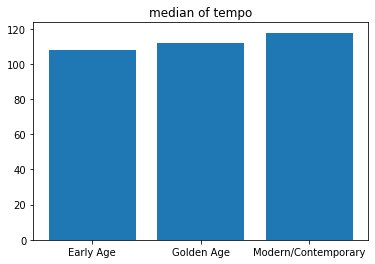

In [20]:
print(mannwhitneyu(early_musicals['tempo'],non_contemporary_musicals['tempo'], alternative='less' ))

plt.bar(x, median['tempo'])
plt.title('median of tempo')
#save figure
plt.gcf() # get current figure - helps with savefig
plt.savefig('figures/MedianPerPeriodTempo.jpg')

# Conclusions

This was an initial effort into understanding how musicals evolved over time. Although we couldn't precise the specific number of musical eras using audio features, there is meaningful in information in our data and we could differentiate musicals from three periods we estimated. 

We also tested a few hypothesis from those periods that held true, such as Modern/Contemporary musicals having longer songs, more spechiness, and more loudness. 

There are many more questions that could be answered in the future as a continuation of this analysis.
- Which era has more differences within their own songs?
- How can we improve classifying Early Age musicals? 
- What other features are important to characterize an Early Age musical? 


# Limitations 
Even though our dataset is significant, we don't have a complete dataset of all musicals, so we are skewing our results to musicals that were available on Spotify API, Wikipedia, and Stlyrics.com. 




# References

Musical Theatre Eras
- https://www.chicagostagereview.com/history-of-musical-theatre-timeline/
- https://www.pbs.org/wnet/broadway/timelines/
- https://prezi.com/rxpmmf1u4sut/eras-of-musical-theatre/
- https://en.wikipedia.org/wiki/Musical_theatre
- http://musiciandevelopment.com/2017/02/18/genre-guide-musical-theatre/
- https://www.musicals101.com/stagecap.htm
- https://trace.tennessee.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1093&context=gamut

Audio Features
- https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object


